# USGS data retrieval (Python version)

[Github](https://github.com/USGS-python/dataretrieval)

Available service:

- instantaneous values (`iv`)
- daily values (`dv`)
- statistics (`stat`)
- site info (`site`)
- discharge peaks (`peaks`)
- discharge measurements (`measurements`)
- water quality samples (`qwdata`)

USGS use various codes for basic retrievals:

- site id
- parameter code ([full list](https://help.waterdata.usgs.gov/code/parameter_cd_query?fmt=rdb&inline=true&group_cd=%))

    - common codes
    
|code|name|$unit$|
|----|----|----|
|00010|Temperature, water|$deg C$|
|00060|discharge, |$ft^3/s$|
|00065|gage height, |$ft$|
|00095|Specific conductance, water, unfiltered|$uS/cm @25C$|
|00300| Dissolved oxygen|$mg/L$|
|00301|Diss oxygen| %saturtn
|00400| pH
|00618|nitrate, filtered (dissovled), water, |$mg/L$|
|00620|nitrate, unfiltered (total), water, |$mg/L$|
|00681|DOC|$mg/L$|
|63680| Turbidity | Form Neph
|72019|depth to water level| ft
|99133| NO3+NO2 water,insitu|$mg/L$

- statistic code ([full list](https://help.waterdata.usgs.gov/code/stat_cd_nm_query?stat_nm_cd=%25&fmt=html))

    - common codes
    
code|name
:---:|:---:
00001|maximum
00002|minimum
00003|mean

In [1]:
%load_ext autoreload
%autoreload 2 # reload all modules everytime before execution

In [2]:
%matplotlib inline
# %matplotlib qt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

In [3]:
import seaborn as sns

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import dataretrieval.nwis as nwis

In [6]:
import sys
sys.path.append("../../")
import myfunctions.general_plots as gp
# import myfunctions.ATSutils as ATSutils

In [7]:
para_codes = {'temperature':'00010', 'discharge':'00060', 'SpC':'00095'}

In [61]:
site_id = ['01436000'] # neversink wateshed
start_date = '2014-10-01'

## instantaneous values (iv)

In [65]:
df = nwis.get_record(sites=site_id, service='iv', start=start_date, parameterCd= para_codes['discharge'])

In [66]:
df

,00060,00060_cd,site_no
datetime,,,
2014-10-01 00:00:00-05:00,88.7,A,01436000
2014-10-01 00:15:00-05:00,88.7,A,01436000
2014-10-01 00:30:00-05:00,88.7,A,01436000
2014-10-01 00:45:00-05:00,88.7,A,01436000
2014-10-01 01:00:00-05:00,88.7,A,01436000
...,...,...,...
2021-07-16 09:15:00-05:00,395.0,P,01436000
2021-07-16 09:30:00-05:00,395.0,P,01436000
2021-07-16 09:45:00-05:00,395.0,P,01436000


Rename column and remove weird values

In [67]:
df.rename(columns={'00060':'discharge [ft^3/s]'}, inplace = True)

df[df['discharge [ft^3/s]'] < 0 ] = np.nan

df = df[df.index.notnull()]

df.loc[:, 'discharge [m^3/d]'] = df.loc[:, 'discharge [ft^3/s]'] * 2446.58 # convert from ft3/s to m3/d

In [68]:
df.head()

,discharge [ft^3/s],00060_cd,site_no,discharge [m^3/d]
datetime,,,,
2014-10-01 00:00:00-05:00,88.7,A,01436000,217011.646
2014-10-01 00:15:00-05:00,88.7,A,01436000,217011.646
2014-10-01 00:30:00-05:00,88.7,A,01436000,217011.646
2014-10-01 00:45:00-05:00,88.7,A,01436000,217011.646
2014-10-01 01:00:00-05:00,88.7,A,01436000,217011.646


Text(0, 0.5, 'Discharge [$m^3/d$]')

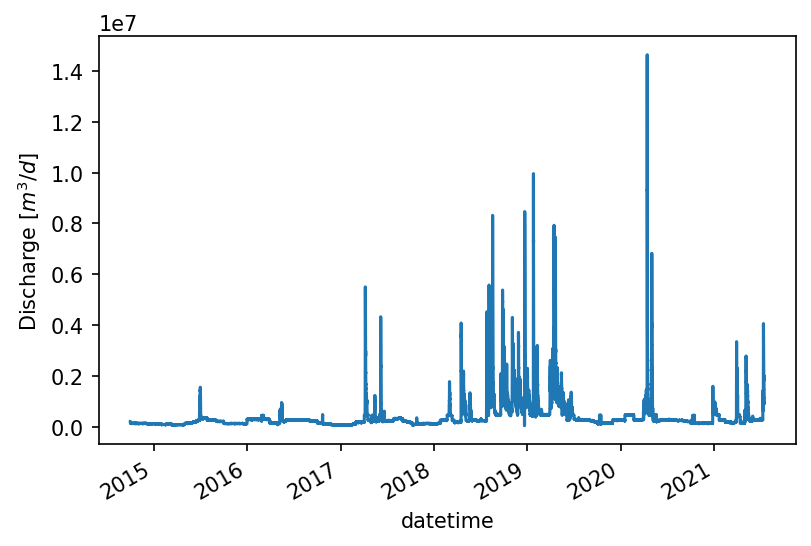

In [69]:
df['discharge [m^3/d]'].plot()
plt.ylabel("Discharge [$m^3/d$]")

In [18]:
df.to_csv(f"Discharge_USGS{site_id}.csv")

## daily values (dv)

In [70]:
df_dv = nwis.get_record(sites=site_id, service='dv', start=start_date, parameterCd= para_codes['temperature'])

In [71]:
df_dv

,00010_Maximum,00010_Maximum_cd,site_no,00010_Minimum,00010_Minimum_cd,00010_Mean,00010_Mean_cd
datetime,,,,,,,
2019-07-13 00:00:00+00:00,10.9,A,01436000,7.2,A,8.7,A
2019-07-14 00:00:00+00:00,10.3,A,01436000,7.4,A,8.6,A
2019-07-15 00:00:00+00:00,10.5,A,01436000,7.5,A,8.7,A
2019-07-16 00:00:00+00:00,10.4,A,01436000,7.4,A,8.5,A
2019-07-17 00:00:00+00:00,10.0,A,01436000,6.3,A,8.0,A
...,...,...,...,...,...,...,...
2021-07-11 00:00:00+00:00,20.8,P,01436000,16.8,P,19.3,P
2021-07-12 00:00:00+00:00,21.5,P,01436000,17.8,P,20.3,P
2021-07-13 00:00:00+00:00,19.8,P,01436000,18.7,P,19.4,P


In [72]:
df_dv.rename(columns={'00010_Mean':'T_mean [degC]'}, inplace = True)
# df_dv[df_dv['discharge [ft^3/s]'] < 0 ] = np.nan
# df_dv = df_dv[df_dv.index.notnull()]

<AxesSubplot:xlabel='datetime'>

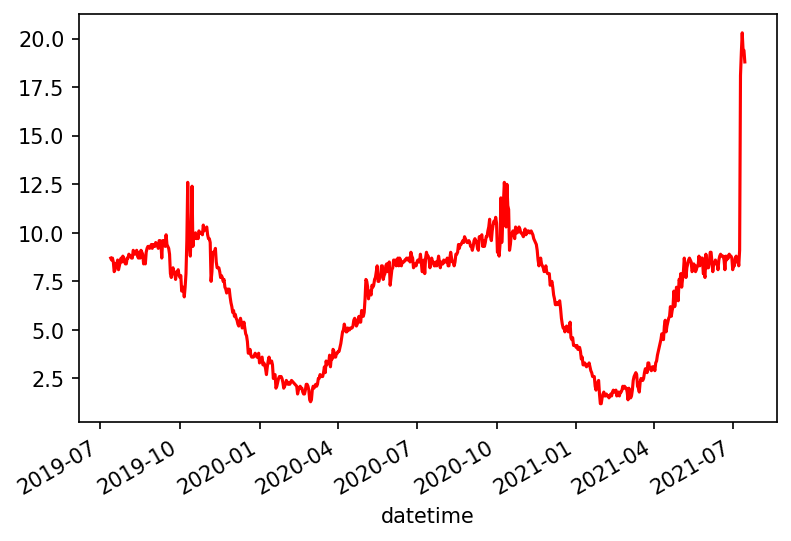

In [73]:
df_dv['T_mean [degC]'].plot(color = 'r')

## water quality

In [ ]:
df_qw = nwis.get_record(sites=site_id, service='qwdata', start= start_date)

## Site info

get basic info about the site

In [63]:
df = nwis.get_record(sites=site_id, service='site')
df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,01436000,NEVERSINK RIVER AT NEVERSINK NY,ST,414912,743808,41.82,-74.635556,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## query by region

In [26]:
df = nwis.get_info(stateCd = "WA", parameterCd= para_codes['discharge'])
df[0]

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,12009500,"BEAR BRANCH NEAR NASELLE, WA",ST,461948.00,1235437.00,46.329825,-123.911540,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,12010000,"NASELLE RIVER NEAR NASELLE, WA",ST,462227.00,1234432.00,46.373994,-123.743482,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,12010500,"SALMON CREEK NEAR NASELLE, WA",ST,462120.00,1234500.00,46.355383,-123.751259,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,12010700,"SOUTH FORK NASELLE RIVER NEAR NASELLE, WA",ST,462039.00,1234823.00,46.343993,-123.807649,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,12011000,"NORTH NEMAH RIVER NEAR SOUTH BEND, WA",ST,462930.00,1235000.00,46.491490,-123.834602,M,S,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,USGS,462023120075200,"DR 2 AT YAKIMA VALLEY HIGHWAY NEAR GRANGER, WA",ST,462022.63,1200751.54,46.339472,-120.132143,M,H,...,Y,NaN,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1149,USGS,465604119335901,"W69.7 LATERAL NEAR ROYAL CITY, WA",ST,465604.00,1193359.00,46.934305,-119.567533,M,F,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1150,USGS,475642118054201,28N/37E-12C03,GW,475642.00,1180542.00,47.944884,-118.096088,M,F,...,Y,C,NYNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,WA41300
1151,USGS,482132122283401,SKAGIT DELTA (NEW DIST MID),ES,482132.30,1222834.90,48.358972,-122.476361,G,1,...,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,WACB4N2


In [27]:
df = nwis.get_info(bBox = [-76.6,38.3,-74.0,42.6], parameterCd= para_codes['discharge'])
df[0]

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,01349541,SUGARLOAF BROOK SOUTH OF TANNERSVILLE NY,ST,420842.0,740723.0,42.145000,-74.123056,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,01349700,EAST KILL NEAR JEWETT CENTER NY,ST,421457.0,741810.0,42.249167,-74.302778,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,01349705,SCHOHARIE CREEK NEAR LEXINGTON NY,ST,421413.0,742025.0,42.236944,-74.340278,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,01349711,WEST KILL BELOW HUNTER BROOK NEAR SPRUCETON NY,ST,421106.0,741637.0,42.185000,-74.276944,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,01349810,WEST KILL NEAR WEST KILL NY,ST,421349.0,742335.0,42.230278,-74.393056,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,USGS,420033074241501,NSTWN0003,ST,420033.0,742415.0,42.009259,-74.403762,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK
1259,USGS,420034074242901,NSTWN0002,ST,420034.0,742429.0,42.009537,-74.407651,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK
1260,USGS,420049074283901,NSTAB0060,ST,420049.0,742839.0,42.013703,-74.477097,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK
1261,USGS,420135074285101,NSTBB0040,ST,420135.0,742851.0,42.026481,-74.480431,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK


In [74]:
huc = '02040104' # only HUC8 or higher is supported?

df = nwis.get_info(huc = huc, parameterCd= para_codes['discharge'])[0]
df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,01432110,"Lackawaxen River at Rowland, PA",ST,412833.0,750212.0,41.475923,-75.036281,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,01432150,BEAVER BROOK NEAR BARRYVILLE NY,ST,412855.0,745703.0,41.482034,-74.950445,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,01432160,DELAWARE RIVER AT BARRYVILLE NY,ST,412831.0,745446.0,41.475368,-74.912389,M,S,...,N,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,01432495,"Shohola Creek near Walker Lake, PA",ST,412700.0,745518.0,41.450000,-74.921667,M,S,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,01432600,"Twin Lakes Creek near Shohola, PA",ST,412605.0,745320.0,41.434813,-74.888500,M,U,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,USGS,420033074241501,NSTWN0003,ST,420033.0,742415.0,42.009259,-74.403762,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK
106,USGS,420034074242901,NSTWN0002,ST,420034.0,742429.0,42.009537,-74.407651,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK
107,USGS,420049074283901,NSTAB0060,ST,420049.0,742839.0,42.013703,-74.477097,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK
108,USGS,420135074285101,NSTBB0040,ST,420135.0,742851.0,42.026481,-74.480431,M,S,...,N,C,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NEVERSINK


In [75]:
df.drop_duplicates(subset=['dec_lat_va', 'dec_long_va'], inplace = True)

## interactive map

Show on map using `ipyleaflet`

In [77]:
from ipyleaflet import Map, Marker, Popup, basemaps, GeoData, MarkerCluster, FullScreenControl, LayersControl, basemap_to_tiles
# from ipywidgets import HTML

In [82]:
import geopandas

In [98]:
center = (41.5, -74.5)

m = Map(center=center, zoom=8) # try different basemaps.CartoDB.Positron, basemaps.Esri.WorldImagery

# add marker cluster
m.add_layer(MarkerCluster(
 markers=[Marker(title = station+'-'+name, location= (lat, long), rise_on_hover = True, draggable = False) \
          for station,name,lat,long in zip(df.site_no, df.station_nm, df.dec_lat_va, df.dec_long_va)], name = 'USGS streamflow gauge'), 
 )

# add watershed boundary
watershed = geopandas.read_file('../data/shapefiles/Neversink_WGS.shp')
watershed_data = GeoData(geo_dataframe = watershed,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Neversink')
m.add_layer(watershed_data)

# add different basemap as layer
basemap1 = basemap_to_tiles(basemaps.Esri.WorldImagery)
m.add_layer(basemap1)

# add full screen 
m.add_control(FullScreenControl())

# add layer control
m.add_control(LayersControl())

display(m)

Map(center=[41.5, -74.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

Save to `HTML`

In [ ]:
m.save('./results/my_map.html', title='My Map')

Export to `PNG`

In [101]:
from ipywebrtc import WidgetStream, ImageRecorder

widget_stream = WidgetStream(widget=m, max_fps=1)
image_recorder = ImageRecorder(stream=widget_stream)
# display(image_recorder)

with open('./figures/map.png', 'wb') as f:
    f.write(image_recorder.image.value)

# Use hydrofunctions

In [29]:
import hydrofunctions as hf

In [30]:
site_id = '01436000'
# site_id = '09111250'
start_date = '2014-10-01'

In [31]:
herring = hf.NWIS(site_id, 'iv', start_date= start_date)

Requested data from https://nwis.waterservices.usgs.gov/nwis/iv/?format=json%2C1.1&sites=01436000&startDT=2014-10-01


In [32]:
herring

USGS:01436000: NEVERSINK RIVER AT NEVERSINK NY
    00010: <15 * Minutes>  Temperature, water, degrees Celsius 
    00060: <15 * Minutes>  Discharge, cubic feet per second 
    00065: <15 * Minutes>  Gage height, feet 
    00095: <15 * Minutes>  Specific conductance, water, unfiltered, microsiemens per centimeter at 25 degrees Celsius 
Start: 2014-10-01 05:00:00+00:00
End:   2021-07-16 05:15:00+00:00

In [33]:
herring.df('discharge')

,USGS:01436000:00060:00000
datetimeUTC,
2014-10-01 05:00:00+00:00,88.7
2014-10-01 05:15:00+00:00,88.7
2014-10-01 05:30:00+00:00,88.7
2014-10-01 05:45:00+00:00,88.7
2014-10-01 06:00:00+00:00,88.7
...,...
2021-07-16 04:15:00+00:00,428.0
2021-07-16 04:30:00+00:00,428.0
2021-07-16 04:45:00+00:00,428.0


<AxesSubplot:xlabel='datetimeUTC'>

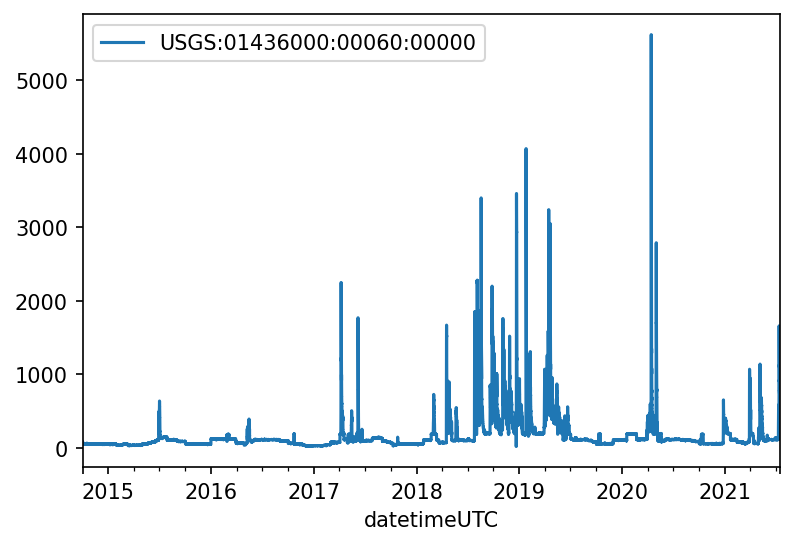

In [34]:
herring.df('q').plot()